# Some Examples of Geneologic Separation by Fatures

## Only from Lexicon Features:
### example1:
   * 129A Hand and Arm
   * 136A M-T Pronouns
   * 136B M in First Person Singular
   * 137A N-M Pronouns

** top 2 families: ** Pama-Nyungan, Indo-European

In [31]:
library(FactoMineR)

In [32]:
family <- function(fams) {
    function(fam) {
        if (fam %in% fams) as.character(fam) else 'other'
    }
}

top2mca <-function(data,fams) {
    data$X <- NULL
    data$wals_code <- NULL
    data$iso_code <- NULL
    data$glottocode <- NULL
    data$countrycodes <- NULL
    data$Name <- NULL
    data$family <-  as.factor(sapply(data$family,family(fams)))
    ans <- list(
        'data' = data, 
        'marked' = which(data$family %in% fams),
        'mca' = MCA(data,quanti.sup=1:2,quali.sup=3:5)
    )
    ans
}

In [33]:
example1 <- read.csv('example1.csv')
mca1 <- top2mca(example1,c('Pama-Nyungan','Indo-European'))

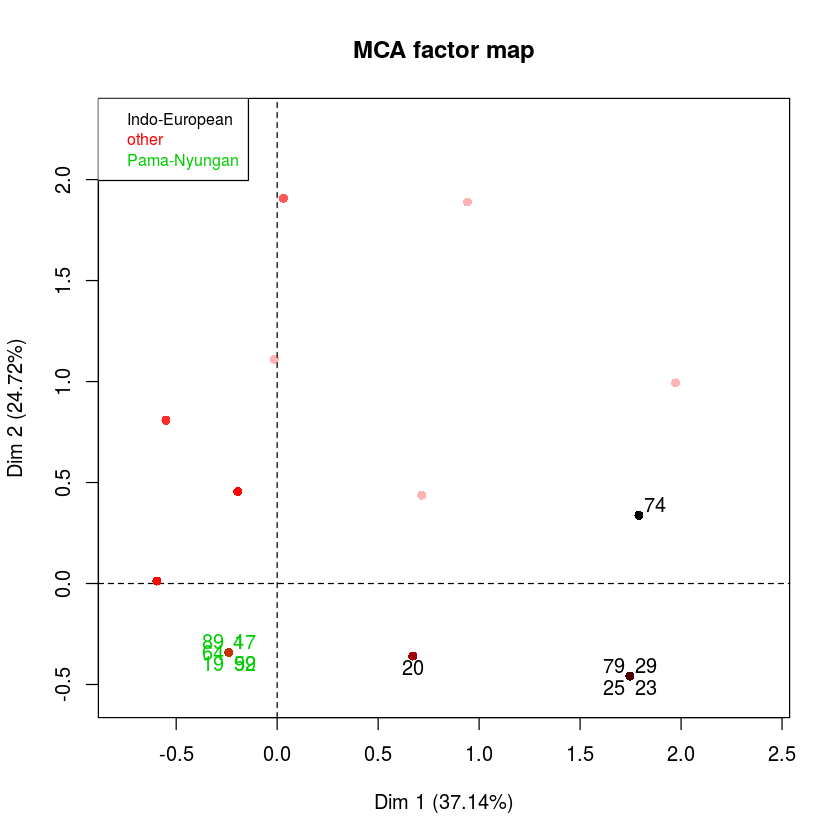

In [34]:
plot(mca1$mca,choix="ind",habillage="family",invisible=c("var","quali.sup"),select=mca1$marked)

In [35]:
mca1$mca$var$cos2

,Dim 1,Dim 2,Dim 3,Dim 4,Dim 5
1 Identical,0.002939507,0.6141781017,0.001066747,0.3818027016,1.294265e-05
2 Different,0.002939507,0.6141781017,0.001066747,0.3818027016,1.294265e-05
1 No M-T pronouns,0.833500154,0.0047397121,0.054206076,0.0006011135,1.069529e-01
"2 M-T pronouns, paradigmatic",0.833500154,0.0047397121,0.054206076,0.0006011135,1.069529e-01
1 No m in first person singular,0.862806356,0.0002250777,0.025695183,0.0000637941,1.112096e-01
2 m in first person singular,0.862806356,0.0002250777,0.025695183,0.0000637941,1.112096e-01
1 No N-M pronouns,0.049326612,0.3591075010,0.403734591,0.1878256004,5.695526e-06
"2 N-M pronouns, paradigmatic",0.137074960,0.0414470166,0.809761405,0.0113152177,4.014011e-04
"3 N-M pronouns, non-paradigmatic",0.033881771,0.5357290480,0.078660988,0.3510110299,7.171631e-04


### example2:
 * 129A Hand and Arm
 * 136B M in First Person Singular
 * 137A N-M Pronouns
 * 137B M in Second Person Singular

** top 2 languages: ** Pama-Nyungan, Into-European

In [36]:
example2 <- read.csv('example2.csv')
mca2 <- top2mca(example2,c('Pama-Nyungan','Indo-European'))

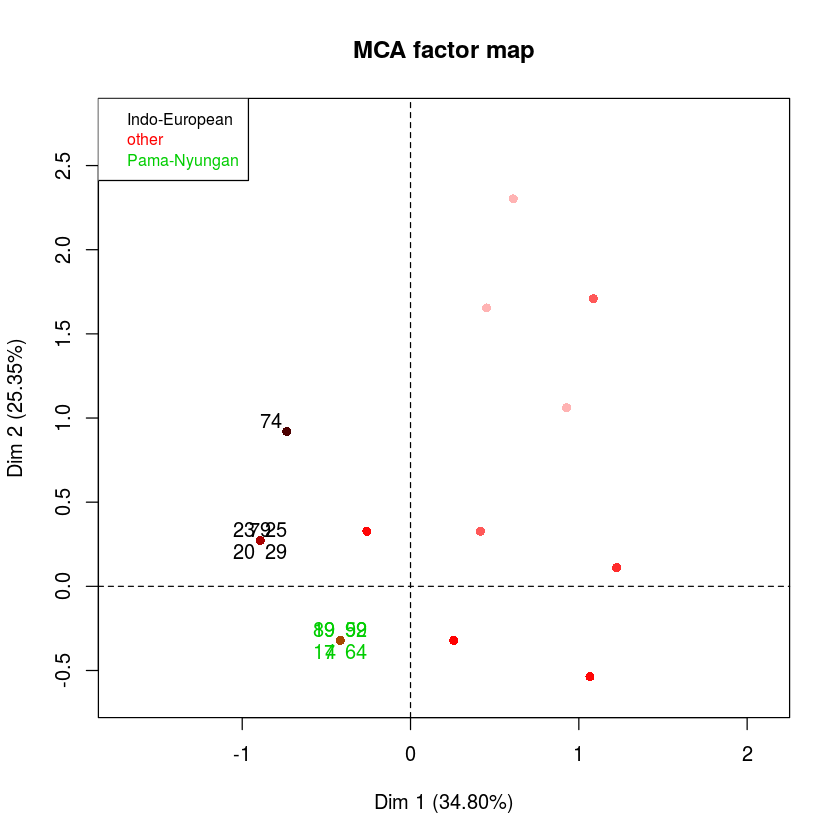

In [37]:
plot(mca2$mca,choix="ind",habillage="family",invisible=c("var","quali.sup"),select=mca2$marked)

### More Diverse with More Languages

### 4 long group covering 733 languages
 * quality index: 3.00
 * dim1: 14%
 * dim2: 11%
 * fields: 'word_order': 3, 'nominal_categories': 1
 * features:
        143G Minor morphological means of signaling negation  
        51A Position of Case Affixes
        83A Order of Object and Verb
        95A Relationship between the Order of Object and Verb and the Order of Adposition and Noun Phrase

 * family1: 95 (Austronesian), 
 * family2: 61 (Sino-Tibetan), 
 * separation: 0.51


    

In [38]:
example3 <- read.csv('chunked-feature-sets/143G-51A-83A-95A-733.csv')
mca3 <- top2mca(example3,c('Austronesian','Sino-Tibetan'))

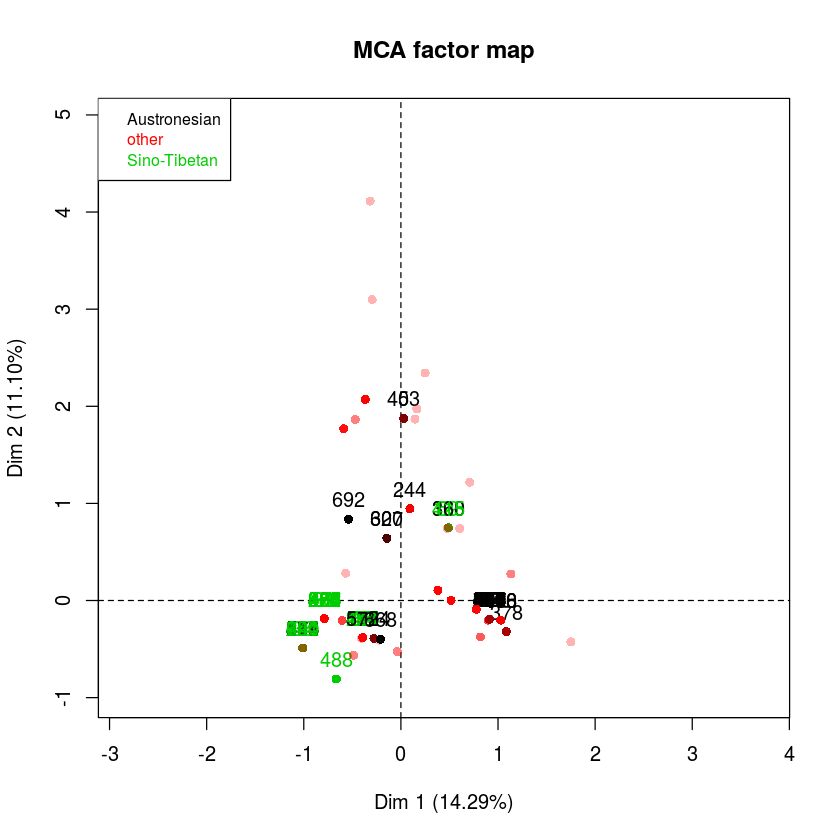

In [39]:
plot(mca3$mca,choix="ind",habillage="family",invisible=c("var","quali.sup"),select=mca3$marked)

### 4 long group covering 329 languages
 - quality index: 3.13
 - dim1: 13%
 - dim2: 9%
 - fields: 'verbal_categories': 2, 'morphology': 1, 'nominal_categories': 1
 - features:
       26A Prefixing vs. Suffixing in Inflectional Morphology
       33A Coding of Nominal Plurality
       69A Position of Tense-Aspect Affixes
       70A The Morphological Imperative
 - family1: 32 (Indo-European) 
 - family2: 27 (Austronesian)
 - separation: 0.32 (on nine dimensions)

In [40]:
example4  <- read.csv('chunked-feature-sets/26A-33A-69A-70A-329.csv')
mca4 <- top2mca(example4,c('Indo-European','Austronesian'))

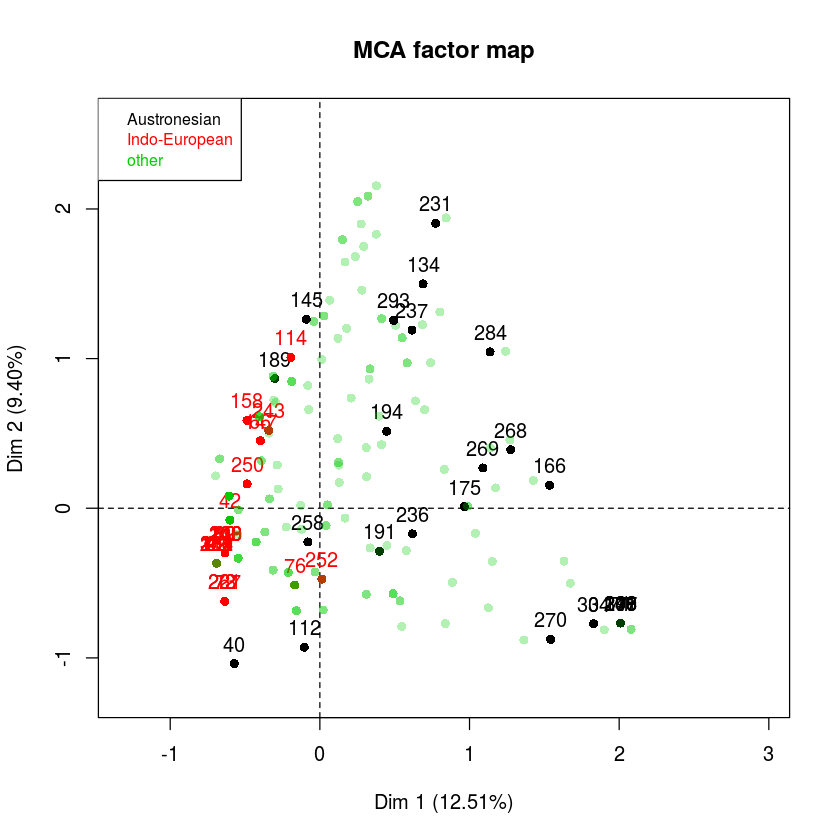

In [41]:
plot(mca4$mca,choix="ind",habillage="family",invisible=c("var","quali.sup"),select=mca4$marked)

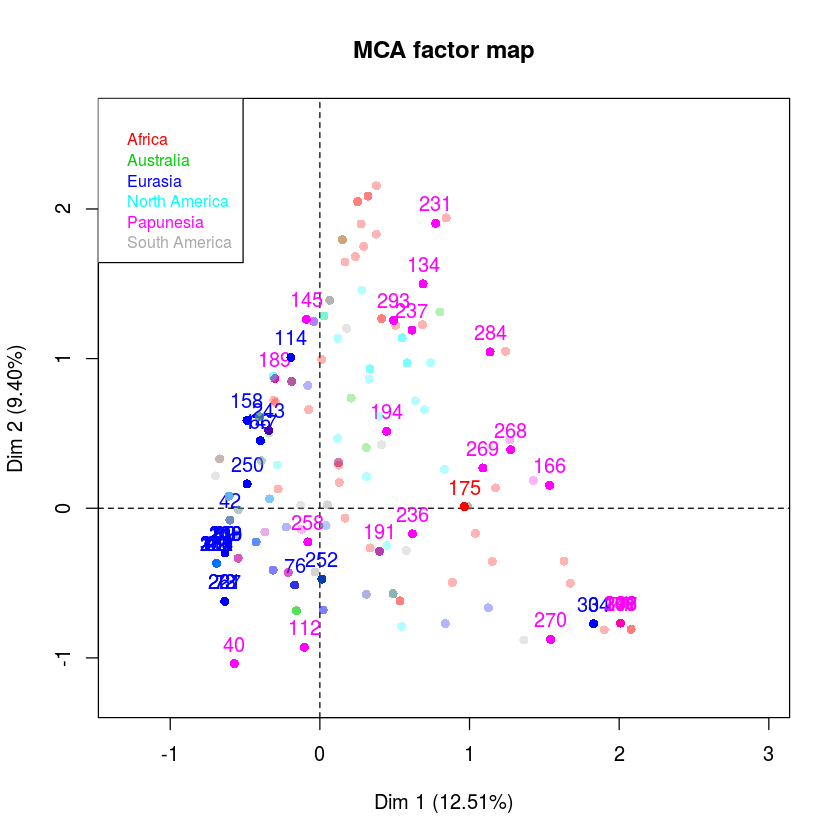

In [42]:
plot(mca4$mca,choix="ind",habillage="macroarea",invisible=c("var","quali.sup"),select=mca4$marked)

In [43]:
mca4$data[c(304,270),]

,latitude,longitude,genus,family,macroarea,X26A,X33A,X69A,X70A
304,8.00000,98.33333,Malayo-Sumbawan,Austronesian,Eurasia,1 Little affixation,9 No plural,5 No tense-aspect inflection,5 No second-person imperatives
270,-17.66667,-149.58333,Oceanic,Austronesian,Papunesia,1 Little affixation,7 Plural word,5 No tense-aspect inflection,4 Second person number-neutral


This is beginning to look like something I think. Let's throw the third language in:

In [44]:
mca5 <- top2mca(example4,c('Indo-European','Austronesian','Niger-Congo'))

In [ ]:
plot(mca5$mca,choix="ind",habillage="family",invisible=c("var","quali.sup"),select=mca5$marked)